<a href="https://colab.research.google.com/github/BerniceJewel/Computational-Finance-Programming/blob/main/GBM_model_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kde

In [6]:
#EXERCISE
def euler_scheme(X0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    Xt = np.zeros(N+1)
    Xt[0] = X0

    for i in range(1, N+1):
        dWt = np.random.normal(0, np.sqrt(dt))
        Xt[i] = Xt[i-1] + mu * Xt[i-1] * dt + sigma * Xt[i-1] * dWt

    return Xt

In [7]:
# Defining the Parameters
X0 = 1
mu = 0.06
sigma = 0.2
T = 1
N = 1000

In [8]:
# Exact Solution
t = np.linspace(0, T, N+1)
exact_solution = X0 * np.exp((mu - sigma**2/2) * t + sigma * np.random.normal(0, 1, N+1))

# Euler Scheme
euler_solution = euler_scheme(X0, mu, sigma, T, N)

# Calculating the Log Absolute Error
log_abs_error = np.log(np.abs(euler_solution - exact_solution))

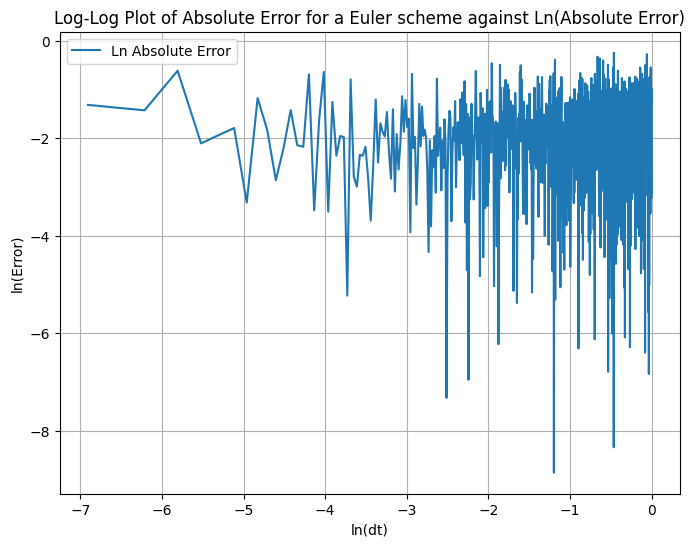

In [9]:
# Fitting the Linear Regression to find the coefficients
coefficients = np.polyfit(np.log(t[1:]), log_abs_error[1:], 1)
a, b = coefficients

# Plotting the Log Absolute Error
plt.figure(figsize=(8, 6))
plt.plot(np.log(t[1:]), log_abs_error[1:], label='Ln Absolute Error')
plt.xlabel('ln(dt)')
plt.ylabel('ln(Error)')
plt.title('Log-Log Plot of Absolute Error for a Euler scheme against Ln(Absolute Error)')
plt.legend()
plt.grid(True)
plt.show()